# Digit classification

## Importing packeges and libraries

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

## Importing the data

In [203]:
dc_train = pd.read_csv("C:\\AAU\\miniproject\\train.csv")
dc_test = pd.read_csv("C:\\AAU\\miniproject\\test.csv")
sub = pd.read_csv("C:\\AAU\\miniproject\\sample_submission.csv")

### Exploring the Dataset

In [204]:
# Just printing out what information is stored in the tables
print(dc_train)
print(dc_test)

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

In [205]:
dc_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


### Removing the label column from the Training-Dataset and restoring it

In [206]:
dc_label = dc_train['label']
dc_train.drop(['label'], axis=1, inplace=True)
print(dc_train.shape, dc_label.shape)

(42000, 784) (42000,)


### Looking at the number distribution

In [207]:
import warnings
warnings.filterwarnings('ignore')

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

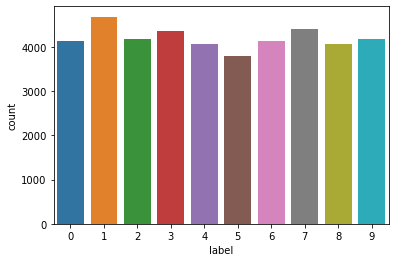

In [208]:
# Vilsualizing the distribution and getting the amount of each digit
sns.countplot(dc_label)
dc_label.value_counts()

### Looking at the pixel-values and their frequency (0-black, 255-white)

Text(0, 0.5, 'Frequency')

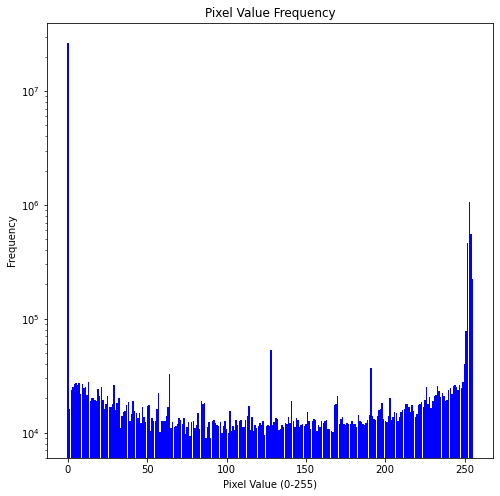

In [209]:
y = pd.value_counts(dc_train.values.ravel()).sort_index()
N = len(y)
x = range(N)
width =0.9
plt.figure(figsize=[8,8])
plt.bar(x, y, width, color="blue")
plt.title('Pixel Value Frequency')
plt.yscale('log')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')

### Visualizing some random digits

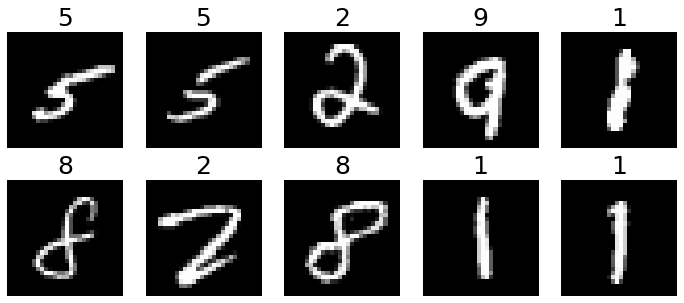

(42000, 784)


In [210]:
fig, axes = plt.subplots(2,5, figsize=(12,5))
axes = axes.flatten()
idx = np.random.randint(0,42000,size=10)
for i in range(10):
    axes[i].imshow(dc_train.iloc[idx[i],:].values.reshape(28,28), cmap='gray')
    axes[i].axis('off') # hide the axes ticks
    axes[i].set_title(str(int(dc_label[idx[i]])), color= 'black', fontsize=25)
plt.show()
print(dc_train.shape)

### Importing scikit-learn library to build and train the model

In [211]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [212]:
# Preprocessing the data by scaling/standartisize the features
X_scaled = scale(dc_train)

# Randomizing the training set into training- and testing-subset, because we know the outcome (label/digit)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, dc_label, train_size=0.2, test_size=0.8, random_state=101)

In [213]:
print('X_train shape:',X_train.shape)
print('Y_train shape:',Y_train.shape)
print('X_test shape:',X_test.shape)
print('Y_test shape:',Y_test.shape)

X_train shape: (8400, 784)
Y_train shape: (8400,)
X_test shape: (33600, 784)
Y_test shape: (33600,)


In [228]:
# The whole training-set consisted of 42.000 digits; now divided into 
# 80%=33.600=training-sbuset, 20%=8.400=training_test-subset

## Building the Model

### 1st try with a linear model:

In [215]:
# Setting up the model
model_linear = SVC(kernel='linear')

# Training the model
model_linear.fit(X_train, Y_train)

# Predicting the outcome based on test-subset
y_pred = model_linear.predict(X_test)

In [216]:
# Visualizing and getting data of the outcome (confusion matrix, accuracy, precision & recall)

# Calculation the accuracy
print("accuracy:", metrics.accuracy_score(y_true=Y_test, y_pred=y_pred), "\n")

# Printing the confusion matrix
print(metrics.confusion_matrix(y_true=Y_test, y_pred=y_pred))

accuracy: 0.913125 

[[3188    0   10    5   11   20   32    3   15    1]
 [   0 3677   14   11    5    7    4    8   30    4]
 [  36   29 3027   54   55   10   30   42   48   12]
 [  13   12  104 3051    9  181    5   21   54   25]
 [   8   14   33    2 3057    4   25   31    6  110]
 [  30   23   29  136   44 2622   44   12   72   27]
 [  26   11   44    4   28   33 3113    0   18    0]
 [   7   24   36   19   59    9    2 3210    4  134]
 [  13   46   50  120   21  110   30   18 2843   21]
 [  19   17   21   22  172   20    4  161   26 2893]]


In [217]:
# Getting precision, recall & f1-score

scores=metrics.classification_report(Y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3285
           1       0.95      0.98      0.97      3760
           2       0.90      0.91      0.90      3343
           3       0.89      0.88      0.88      3475
           4       0.88      0.93      0.91      3290
           5       0.87      0.86      0.87      3039
           6       0.95      0.95      0.95      3277
           7       0.92      0.92      0.92      3504
           8       0.91      0.87      0.89      3272
           9       0.90      0.86      0.88      3355

    accuracy                           0.91     33600
   macro avg       0.91      0.91      0.91     33600
weighted avg       0.91      0.91      0.91     33600



In [218]:
#  ≈ 91% accuracy/ weighted avg precision, refall & f1-score. 

### 2nd try with a non- linear model and a poly kernel

In [219]:
# C=1, default value of gamma

# Setting up the model
non_linear_model_poly = SVC(kernel='poly')

# Training the model
non_linear_model_poly.fit(X_train, Y_train)

# Predictiing the outcome based on test-subset
y_pred = non_linear_model_poly.predict(X_test)

In [220]:
# Visualizing and getting data of the outcome (confusion matrix, accuracy)

# Calculation the accuracy
print("accuracy:", metrics.accuracy_score(y_true=Y_test, y_pred=y_pred), "\n")

# Printing the confusion matrix
print(metrics.confusion_matrix(y_true=Y_test, y_pred=y_pred))

accuracy: 0.8822619047619048 

[[2927    0    9    3   43   11   27    0  262    3]
 [   1 3681   11    2   12    0    6    0   45    2]
 [  15   18 2562   31  152    2   10   23  520   10]
 [   0   16   23 2921   28   40    3   15  387   42]
 [   3    8   14    0 3110    8    4    5   13  125]
 [   6    1    5   68   76 2429   29    7  377   41]
 [  17    8    9    0  101   45 2943    2  152    0]
 [   1   34    8    8  155    1    0 2918   77  302]
 [   3   16    7   29   25   39    3    5 3128   17]
 [   5   11    1   17  166    8    0   41   81 3025]]


In [221]:
# The accuracy is lower than the linear model. So let's try the Rbf-Kernal

### 3rd try with non- linear model and a rbf kernal

In [222]:
# Setting up the model
non_linear_model = SVC(kernel='rbf')

# Training the model
non_linear_model.fit(X_train, Y_train)

# Predictiing the outcome based on test-subset
y_pred = non_linear_model.predict(X_test)

In [223]:
# Visualizing and getting data of the outcome (confusion matrix, accuracy, precision & recall)

# Calculation the accuracy
print("accuracy:", metrics.accuracy_score(y_true=Y_test, y_pred=y_pred), "\n")

# Printing the confusion matrix
print(metrics.confusion_matrix(y_true=Y_test, y_pred=y_pred))

accuracy: 0.9396130952380952 

[[3195    0   22    6    4    9   32    4   13    0]
 [   0 3690   23   13    7    2    7    6    8    4]
 [  15   14 3146   31   31    5   18   37   41    5]
 [   3    8   96 3192    5   72    6   30   43   20]
 [   3    7   57    1 3095   10   20   24    6   67]
 [  15    9   40   66   15 2780   50   15   31   18]
 [  18    5   48    1   11   31 3149    2   12    0]
 [   6   21   72   11   23    3    0 3284    3   81]
 [  13   24   42   63   14   63   22   19 2994   18]
 [  12   10   42   39   80    6    0   96   24 3046]]


In [224]:
# Getting precision, recall & f1-score

scores=metrics.classification_report(Y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3285
           1       0.97      0.98      0.98      3760
           2       0.88      0.94      0.91      3343
           3       0.93      0.92      0.93      3475
           4       0.94      0.94      0.94      3290
           5       0.93      0.91      0.92      3039
           6       0.95      0.96      0.96      3277
           7       0.93      0.94      0.94      3504
           8       0.94      0.92      0.93      3272
           9       0.93      0.91      0.92      3355

    accuracy                           0.94     33600
   macro avg       0.94      0.94      0.94     33600
weighted avg       0.94      0.94      0.94     33600



In [226]:
#  ≈ 94% accuracy/ weighted avg precision, refall & f1-score is the best from the approaches above. 
#        So let's go with it